## New York Solar Resource Data

This is the first R project in part 5 of the Data quest R course. The aim of this project is to extract data from [the  National Renewable Energy Laboratory’s developer network](https://developer.nrel.gov/docs/solar/solar-resource-v1/) to visualize the solar resource data of the state of new york.

The API we’ll work with comes from DATA.GOV, which is a website providing US Government’s open data. We want to extract the Solar Resource Data which contains various types of solar data for a given location, in our case for New York city. The output fields, in kWh/m²/day (kilowatt hours per square meter per day) are as follows:

avg_dni: Average Direct Normal Irradiance representing the amount of solar radiation arriving perpendicularly on a surface per unit area.
avg_ghi: Average Global Horizontal Irradiance representing the amount of solar radiation received by a surface horizontal to the ground.
avg_lat_tilt: Average Tilt at Latitude representing the amount of radiation a surface receives per unit area that doesn’t arrive on a direct path from the sun.

In [ ]:
# Identifying the API URL
url <- "https://developer.nrel.gov/api/solar/solar_resource/v1.json"
# Specifying the necessary parameters to request the New York City solar data, the kay variable was defined in a previous cell
parameters_list <- list(api_key = the_key, lat = 41, lon = -75)

In [ ]:
# Loading the `httr` package and sending GET request
library(httr)
library(jsonlite)
library(purrr)
library(dplyr)
library(tidyr)
library(ggplot2)
response <- GET(url, query = parameters_list)


Attaching package: ‘purrr’


The following object is masked from ‘package:jsonlite’:

    flatten



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [ ]:
# Displaying the status code with the `status_code()` function
status <- status_code(response)
status

[1] 200

In [ ]:
# Displaying the API response format
response_type <- http_type(response)
response_type

[1] "application/json"

In [ ]:
# Extracting the API response content as text
content <- content(response, "text")
print(content)

[1] "{\"version\":\"1.0.0\",\"warnings\":[],\"errors\":[],\"metadata\":{\"sources\":[\"Perez-SUNY/NREL, 2012\"]},\"inputs\":{\"lat\":\"41\",\"lon\":\"-75\"},\"outputs\":{\"avg_dni\":{\"annual\":3.69,\"monthly\":{\"jan\":3.12,\"feb\":3.36,\"mar\":4.1,\"apr\":4.07,\"may\":4.15,\"jun\":4.17,\"jul\":4.6,\"aug\":4.14,\"sep\":4.02,\"oct\":3.26,\"nov\":2.58,\"dec\":2.72}},\"avg_ghi\":{\"annual\":3.87,\"monthly\":{\"jan\":1.97,\"feb\":2.69,\"mar\":3.86,\"apr\":4.7,\"may\":5.45,\"jun\":5.78,\"jul\":5.98,\"aug\":5.14,\"sep\":4.23,\"oct\":2.94,\"nov\":1.99,\"dec\":1.67}},\"avg_lat_tilt\":{\"annual\":4.52,\"monthly\":{\"jan\":3.55,\"feb\":4.04,\"mar\":4.86,\"apr\":4.97,\"may\":5.18,\"jun\":5.24,\"jul\":5.58,\"aug\":5.24,\"sep\":5.0,\"oct\":4.11,\"nov\":3.26,\"dec\":3.13}}}}"


In [ ]:
# Parsing the `json_text` to a R object using the `jsonlite::fromJSON()` function
json_lists <- jsonlite::fromJSON(content)
# Displaying the structure of the R object using the `str()` function
str(json_lists)

List of 6
 $ version : chr "1.0.0"
 $ warnings: list()
 $ errors  : list()
 $ metadata:List of 1
  ..$ sources: chr "Perez-SUNY/NREL, 2012"
 $ inputs  :List of 2
  ..$ lat: chr "41"
  ..$ lon: chr "-75"
 $ outputs :List of 3
  ..$ avg_dni     :List of 2
  .. ..$ annual : num 3.69
  .. ..$ monthly:List of 12
  .. .. ..$ jan: num 3.12
  .. .. ..$ feb: num 3.36
  .. .. ..$ mar: num 4.1
  .. .. ..$ apr: num 4.07
  .. .. ..$ may: num 4.15
  .. .. ..$ jun: num 4.17
  .. .. ..$ jul: num 4.6
  .. .. ..$ aug: num 4.14
  .. .. ..$ sep: num 4.02
  .. .. ..$ oct: num 3.26
  .. .. ..$ nov: num 2.58
  .. .. ..$ dec: num 2.72
  ..$ avg_ghi     :List of 2
  .. ..$ annual : num 3.87
  .. ..$ monthly:List of 12
  .. .. ..$ jan: num 1.97
  .. .. ..$ feb: num 2.69
  .. .. ..$ mar: num 3.86
  .. .. ..$ apr: num 4.7
  .. .. ..$ may: num 5.45
  .. .. ..$ jun: num 5.78
  .. .. ..$ jul: num 5.98
  .. .. ..$ aug: num 5.14
  .. .. ..$ sep: num 4.23
  .. .. ..$ oct: num 2.94
  .. .. ..$ nov: num 1.99
  .. .. ..$ 

In [ ]:
# Extracting the outputs data
outputs_list <- json_lists$outputs
# Extracting the monthly vector (`monthly`) from the (`avg_dni`) list in the outputs data
avg_dni <- outputs_list$avg_dni$monthly
# Extracting the monthly vector (`monthly`) from the (`avg_ghi`) list in the outputs data
avg_ghi <- outputs_list$avg_ghi$monthly
# Extracting the monthly vector (`monthly`) from the (`avg_lat_tilt`) list in the outputs data
avg_lat_tilt <- outputs_list$avg_lat_tilt$monthly
# Combining the monthly vectors into a dataframe using the `tibble::tibble()` function with a month column that has abreviations of month names
dataframe <- tibble::tibble("month" = month.abb,
                            "avg_dni" = avg_dni,
                            "avg_ghi" = avg_ghi,
                            "avg_lat_tilt" = avg_lat_tilt)
# Displaying the dataframe
dataframe

month avg_dni <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> avg_ghi
1  Jan   3.12    3.36 4.1  4.07 4.15 4.17 4.6  4.14 4.02 3.26 2.58 2.72 1.97   
2  Feb   3.12    3.36 4.1  4.07 4.15 4.17 4.6  4.14 4.02 3.26 2.58 2.72 1.97   
3  Mar   3.12    3.36 4.1  4.07 4.15 4.17 4.6  4.14 4.02 3.26 2.58 2.72 1.97   
4  Apr   3.12    3.36 4.1  4.07 4.15 4.17 4.6  4.14 4.02 3.26 2.58 2.72 1.97   
5  May   3.12    3.36 4.1  4.07 4.15 4.17 4.6  4.14 4.02 3.26 2.58 2.72 1.97   
6  Jun   3.12    3.36 4.1  4.07 4.15 4.17 4.6  4.14 4.02 3.26 2.58 2.72 1.97   
7  Jul   3.12    3.36 4.1  4.07 4.15 4.17 4.6  4.14 4.02 3.26 2.58 2.72 1.97   
8  Aug   3.12    3.36 4.1  4.07 4.15 4.17 4.6  4.14 4.02 3.26 2.58 2.72 1.97   
9  Sep   3.12    3.36 4.1  4.07 4.15 4.17 4.6  4.14 4.02 3.26 2.58 2.72 1.97   
10 Oct   3.12    3.36 4.1  4.07 4.15 4.17 4.6  4.14 4.02 3.26 2.58 2.72 1.97   
11 Nov   3.12    3.36 4.1  4.07 4.15 4.17 4.6  4.14 4.02 3.26 2.58 2.72 1.97   
12 Dec   3.12    3.36 4.1  4.07 4.15 4.17 4.6  4.14 4.02 3.26 2.58 2.72 1.97   
   <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> avg_lat_tilt <NA>
1  2.69 3.86 4.7  5.45 5.78 5.98 5.14 4.23 2.94 1.99 1.67 3.55         4.04
2  2.69 3.86 4.7  5.45 5.78 5.98 5.14 4.23 2.94 1.99 1.67 3.55         4.04
3  2.69 3.86 4.7  5.45 5.78 5.98 5.14 4.23 2.94 1.99 1.67 3.55         4.04
4  2.69 3.86 4.7  5.45 5.78 5.98 5.14 4.23 2.94 1.99 1.67 3.55         4.04
5  2.69 3.86 4.7  5.45 5.78 5.98 5.14 4.23 2.94 1.99 1.67 3.55         4.04
6  2.69 3.86 4.7  5.45 5.78 5.98 5.14 4.23 2.94 1.99 1.67 3.55         4.04
7  2.69 3.86 4.7  5.45 5.78 5.98 5.14 4.23 2.94 1.99 1.67 3.55         4.04
8  2.69 3.86 4.7  5.45 5.78 5.98 5.14 4.23 2.94 1.99 1.67 3.55         4.04
9  2.69 3.86 4.7  5.45 5.78 5.98 5.14 4.23 2.94 1.99 1.67 3.55         4.04
10 2.69 3.86 4.7  5.45 5.78 5.98 5.14 4.23 2.94 1.99 1.67 3.55         4.04
11 2.69 3.86 4.7  5.45 5.78 5.98 5.14 4.23 2.94 1.99 1.67 3.55         4.04
12 2.69 3.86 4.7  5.45 5.78 5.98 5.14 4.23 2.94 1.99 1.67 3.55         4.04
   <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA>
1  4.86 4.97 5.18 5.24 5.58 5.24 5    4.11 3.26 3.13
2  4.86 4.97 5.18 5.24 5.58 5.24 5    4.11 3.26 3.13
3  4.86 4.97 5.18 5.24 5.58 5.24 5    4.11 3.26 3.13
4  4.86 4.97 5.18 5.24 5.58 5.24 5    4.11 3.26 3.13
5  4.86 4.97 5.18 5.24 5.58 5.24 5    4.11 3.26 3.13
6  4.86 4.97 5.18 5.24 5.58 5.24 5    4.11 3.26 3.13
7  4.86 4.97 5.18 5.24 5.58 5.24 5    4.11 3.26 3.13
8  4.86 4.97 5.18 5.24 5.58 5.24 5    4.11 3.26 3.13
9  4.86 4.97 5.18 5.24 5.58 5.24 5    4.11 3.26 3.13
10 4.86 4.97 5.18 5.24 5.58 5.24 5    4.11 3.26 3.13
11 4.86 4.97 5.18 5.24 5.58 5.24 5    4.11 3.26 3.13
12 4.86 4.97 5.18 5.24 5.58 5.24 5    4.11 3.26 3.13

In [ ]:
# Creating a function that does all of the previous steps
nrel_api_json_get_df <- function(endpoint, queries = list()) {
  ## Preparing the URL
  url <- modify_url("https://developer.nrel.gov", path = endpoint)
  ## Querying the API
  response <- GET(url, query = queries)
  ## Tracking errors
  if ( http_error(response) ){
    print(status_code(response))
    print(http_status(response))
    stop("Something went wrong.", call. = FALSE)
  }
  if (http_type(response) != "application/json") {
    stop("API did not return json", call. = FALSE)
  }
  ## Extracting content
  json_text <- content(response, "text")
  ## Converting content into Dataframe
  table_lst <- jsonlite::fromJSON(json_text)
  dataframe <- tibble::tibble("month" = month.abb,
                              "avg_dni" = as.numeric(table_lst$outputs$avg_dni$monthly),
                              "avg_ghi" = as.numeric(table_lst$outputs$avg_ghi$monthly),
                              "avg_lat_tilt" = as.numeric(table_lst$outputs$avg_lat_tilt$monthly))
  ## Returning the dataframe
  dataframe
}
dataframe <- nrel_api_json_get_df("api/solar/solar_resource/v1.json", parameters_list)
# Printing the output dataframe
dataframe

month,avg_dni,avg_ghi,avg_lat_tilt
<chr>,<dbl>,<dbl>,<dbl>
Jan,3.12,1.97,3.55
Feb,3.36,2.69,4.04
Mar,4.10,3.86,4.86
Apr,4.07,4.70,4.97
May,4.15,5.45,5.18
Jun,4.17,5.78,5.24
Jul,4.60,5.98,5.58
Aug,4.14,5.14,5.24
Sep,4.02,4.23,5.00


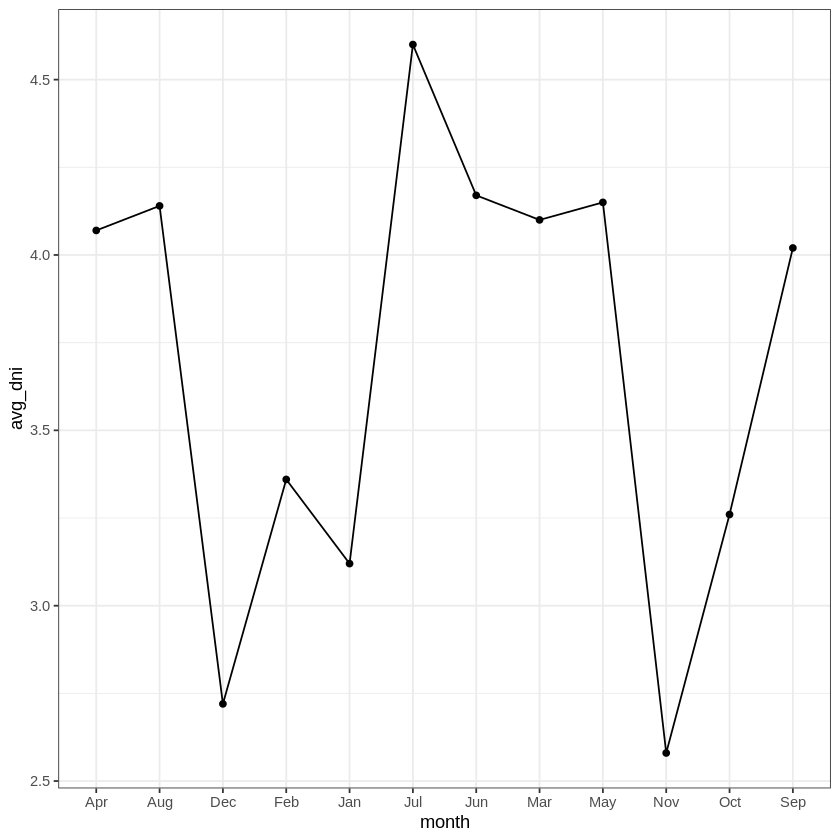

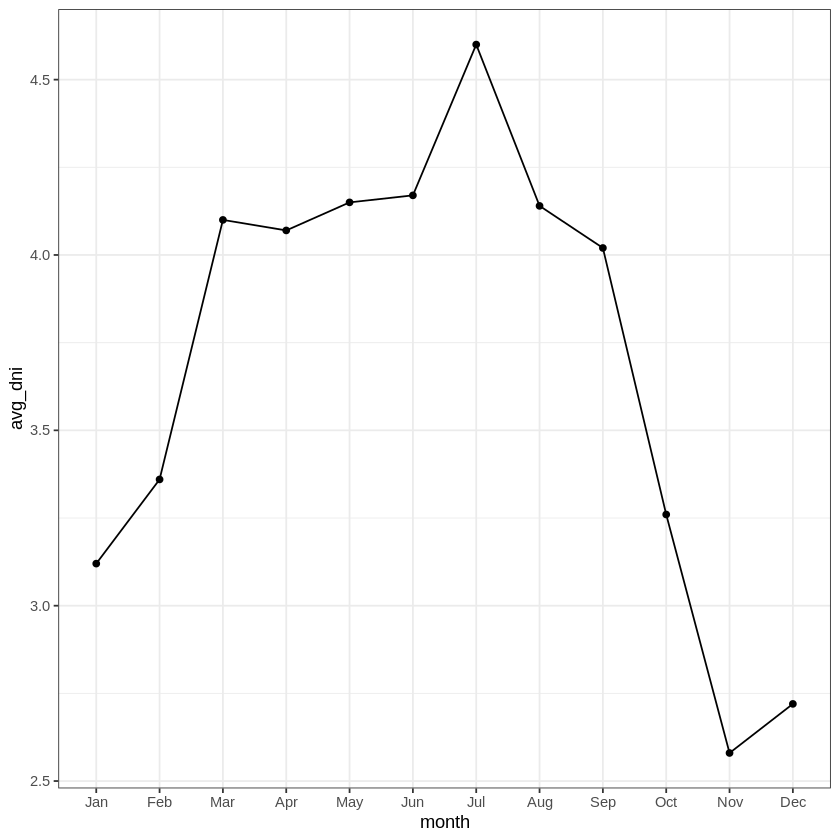

In [ ]:
# Using the `ggplot()` function to plot the `avg_dni` value for each month
ggplot(data = dataframe,
       aes(x = month, y = avg_dni, group = 1)) +
  geom_line() +
  geom_point() +
  theme_bw()
# Converting the `month` column into factor
dataframe <- dataframe %>%
  mutate(month = factor(month, levels = month.abb))
# Replotting the `avg_dni` value for each month
ggplot(data = dataframe,
       aes(x = month, y = avg_dni, group = 1)) +
  geom_line() +
  geom_point() +
  theme_bw()

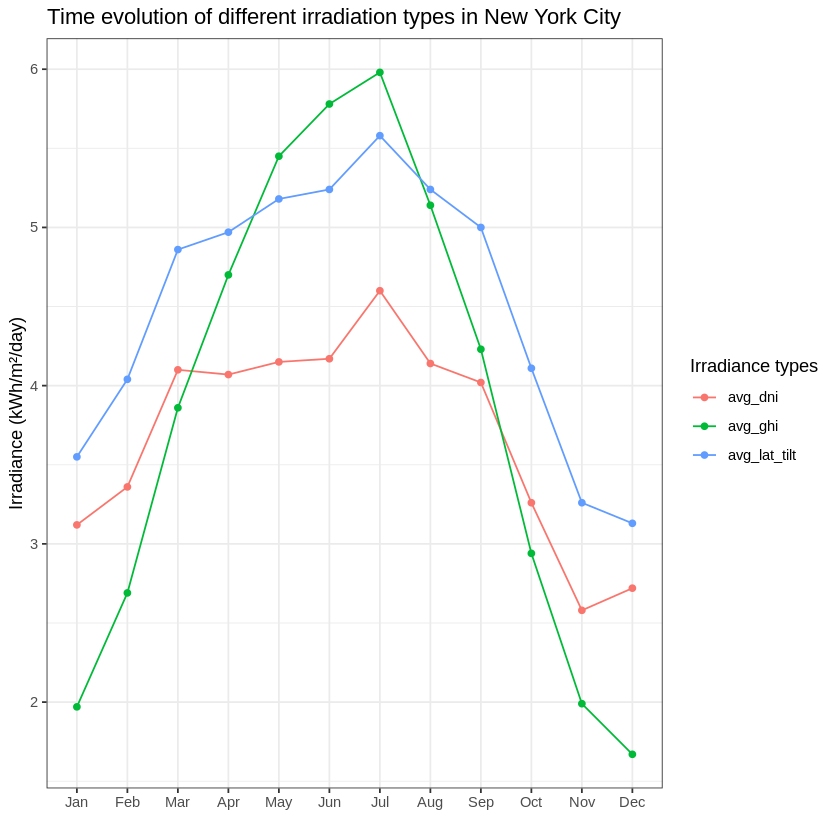

In [ ]:
dataframe %>%
  mutate(month = factor(month, levels = month.abb)) %>%
  pivot_longer(cols = starts_with("avg"), names_to = "irradiance_type") %>%

  ggplot(aes(x = month, y = value, group = irradiance_type, color = irradiance_type)) +
  geom_line() +
  geom_point() +
  labs(title = 'Time evolution of different irradiation types in New York City',
       x = "",
       y = "Irradiance (kWh/m²/day)",
       color = "Irradiance types") +
  theme_bw()

As we can see from the three produced graphs, all three irradiance types show a similar temporal pattern, i.e., higher values towards the middle of the year and lower values around the beginning and end of the year. This is expected, since months with higher values and lower values of irradiation correspond to warmer and colder months, respectively. The month with the highest irradiance was july.